Importing libraries and setting global options

Library versions used:
- pandas: 1.1.5
- seaborn: 0.11.0
- matplotlib: 3.5.3
- numpy: 1.17.5
- scipy: 1.7.0

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats
from matplotlib import pyplot as plt

plt.rcParams.update({'font.size': 15}) #Setting font size for the plots
pd.set_option('display.max_rows', 500) #Settting display options
pd.set_option('display.max_columns', 500)

Loading data

In [2]:
data = pd.read_csv('loan.csv')

/home/vsoorya/.local/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3135: DtypeWarning: Columns (47) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


Let us investigate the data

In [3]:
print("Shape of the data", data.shape)
data.head()

Shape of the data (39717, 111)


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0,Jan-85,1,NaN,NaN,3,0,13648,83.70%,9,f,0.00,0.00,5863.155187,5833.84,5000.00,863.16,0.00,0.00,0.00,Jan-15,171.62,NaN,May-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0,Apr-99,5,NaN,NaN,3,0,1687,9.40%,4,f,0.00,0.00,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,NaN,Sep-13,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,small_business,real estate business,606xx,IL,8.72,0,Nov-01,2,NaN,NaN,2,0,2956,98.50%,10,f,0.00,0.00,3005.666844,3005.67,2400.00,605.67,0.00,0.00,0.00,Jun-14,649.91,NaN,May-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20.00,0,Feb-96,1,35.0,NaN,10,0,5598,21%,37,f,0.00,0.00,12231.890000,12231.89,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,NaN,Apr-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN

### Check DtypeWarning from column 47

When we loaded the data, pandas threw a DtypeWarning at column 47. Let us investigate this.

In [4]:
print("Column name:", data.columns[47])

Column name: next_pymnt_d


Checking the unique values in the column

In [5]:
data[data.columns[47]].unique()

array([nan, 'Jun-16', 'Jul-16'], dtype=object)

In [6]:
data[data.columns[47]].value_counts(dropna=False)

NaN       38577
Jun-16     1125
Jul-16       15
Name: next_pymnt_d, dtype: int64

Percentage of rows with non-NaN values for "next_pymnt_d" column

In [7]:
print("percentage:", data[data[data.columns[47]].isnull()==False].shape[0] / data.shape[0] * 100)

percentage: 2.8703074250321023


Only 2.87% of the rows of data has the "next_pymnt_d" as valid (non-NaN) value. As the amount of valid data is very little, this will not provide any insightful data and this column can be eliminated

In [8]:
data.drop('next_pymnt_d', axis=1, inplace=True)


__________________________________________________________________________________________

# Data Cleanup

## Missing data analysis

Checking the percentage of NaN data in each columns

In [9]:
(data.isnull().sum() / data.shape[0]) * 100

id                                  0.000000
member_id                           0.000000
loan_amnt                           0.000000
funded_amnt                         0.000000
funded_amnt_inv                     0.000000
term                                0.000000
int_rate                            0.000000
installment                         0.000000
grade                               0.000000
sub_grade                           0.000000
emp_title                           6.191303
emp_length                          2.706650
home_ownership                      0.000000
annual_inc                          0.000000
verification_status                 0.000000
issue_d                             0.000000
loan_status                         0.000000
pymnt_plan                          0.000000
url                                 0.000000
desc                               32.580507
purpose                             0.000000
title                               0.027696
zip_code  

We could see that some of the columns do not have any data at all i.e. contains only NaN values. These columns can be completely removed as these are unnecessary for data analysis.

Removing all columns with only NaNs.

In [10]:
columns_to_drop = [col for col in data.columns if data[col].isnull().sum()/ data.shape[0] == 1]
data.drop(columns_to_drop, axis=1, inplace= True)

print("Number of columns removed:", len(columns_to_drop))
print("New shape of data: ", data.shape)

Number of columns removed: 54
New shape of data:  (39717, 56)


### Sorting the columns with the percentage of NaNs in each

This could help figure if there are more columns that could be eliminated

In [11]:
((data.isnull().sum() / data.shape[0]) * 100).sort_values(ascending=False)

mths_since_last_record        92.985372
mths_since_last_delinq        64.662487
desc                          32.580507
emp_title                      6.191303
emp_length                     2.706650
pub_rec_bankruptcies           1.754916
last_pymnt_d                   0.178765
chargeoff_within_12_mths       0.140998
collections_12_mths_ex_med     0.140998
revol_util                     0.125891
tax_liens                      0.098195
title                          0.027696
last_credit_pull_d             0.005036
int_rate                       0.000000
purpose                        0.000000
member_id                      0.000000
loan_amnt                      0.000000
funded_amnt                    0.000000
funded_amnt_inv                0.000000
url                            0.000000
pymnt_plan                     0.000000
loan_status                    0.000000
installment                    0.000000
issue_d                        0.000000
verification_status            0.000000


Now, let us investigate each of the column that has NaN values and see if we can do some data cleaning.

#### Column "mths_since_last_record"

We could see that "mths_since_last_record" has almost 93% of data as NaNs. The column shows "The number of months since the last public record". This data could not be effectively utilised for our data analysis as the data is available only for a very small number of entries.

Thus, eliminating the column.

In [12]:
data.drop("mths_since_last_record", axis=1, inplace=True)

#### Column "mths_since_last_delinq"

This column has almost 65% of data as NaN. Let us analyse the data in the column.

Finding unique values in the column.

In [13]:
data['mths_since_last_delinq'].unique()

array([ nan,  35.,  38.,  61.,   8.,  20.,  18.,  68.,  45.,  48.,  41.,
        40.,  74.,  25.,  53.,  39.,  10.,  26.,  56.,  77.,  28.,  52.,
        24.,  16.,  60.,  54.,  23.,   9.,  11.,  13.,  65.,  19.,  80.,
        22.,  59.,  79.,  44.,  64.,  57.,  14.,  63.,  49.,  15.,  73.,
        70.,  29.,  51.,   5.,  75.,  55.,   2.,  30.,  47.,  33.,  69.,
         4.,  43.,  21.,  27.,  46.,  81.,  78.,  82.,  31.,  76.,  62.,
        72.,  42.,  50.,   3.,  12.,  67.,  36.,  34.,  58.,  17.,  71.,
        66.,  32.,   6.,  37.,   7.,   1.,  83.,  86., 115.,  96., 103.,
       120., 106.,  89., 107.,  85.,  97.,  95.,   0.])

The data in this column shows the number of months since the borrower's last delinquency and the nan values could mean that the borrower never had any delinquency. __Leaving this column as is because the data could be useful for our analysis.__

#### Column "desc"

This column has almost 32% of data as NaN values. Let us analyse the data in this column.

In [14]:
data['desc']

0          Borrower added on 12/22/11 > I need to upgra...
1          Borrower added on 12/22/11 > I plan to use t...
2                                                      NaN
3          Borrower added on 12/21/11 > to pay for prop...
4          Borrower added on 12/21/11 > I plan on combi...
                               ...                        
39712    Our current gutter system on our home is old a...
39713    The rate of interest and fees incurred by carr...
39714                                                  NaN
39715                                                  NaN
39716    I plan to consolidate over $7,000 of debt: a c...
Name: desc, Length: 39717, dtype: object

In [15]:
data['desc'].unique()

array(['  Borrower added on 12/22/11 > I need to upgrade my business technologies.<br>',
       '  Borrower added on 12/22/11 > I plan to use this money to finance the motorcycle i am looking at. I plan to have it paid off as soon as possible/when i sell my old bike. I only need this money because the deal im looking at is to good to pass up.<br><br>  Borrower added on 12/22/11 > I plan to use this money to finance the motorcycle i am looking at. I plan to have it paid off as soon as possible/when i sell my old bike.I only need this money because the deal im looking at is to good to pass up. I have finished college with an associates degree in business and its takingmeplaces<br>',
       nan, ...,
       'Our current gutter system on our home is old and in need of repair.    We will be using the borrowed funds to replace the gutter system on our home.',
       'The rate of interest and fees incurred by carrying a balance on my credit card are so outrageous at this point that continuing

The data in this column are textual and it would be really hard to comprehend for our data analysis. Dropping this column for the data analysis

In [16]:
data.drop("desc", axis=1, inplace=True)

#### Column "emp_title"

This column has around 6% of data as NaN values. Let us analyse the data in this column.

In [17]:
data['emp_title']

0                               NaN
1                             Ryder
2                               NaN
3               AIR RESOURCES BOARD
4          University Medical Group
                    ...            
39712               FiSite Research
39713    Squarewave Solutions, Ltd.
39714                           NaN
39715                           NaN
39716              Evergreen Center
Name: emp_title, Length: 39717, dtype: object

In [18]:
print("Number of unique values:", len(data['emp_title'].unique()))

Number of unique values: 28821


In [19]:
data['emp_title'].value_counts()[:]

US Army                             134
Bank of America                     109
IBM                                  66
AT&T                                 59
Kaiser Permanente                    56
                                   ... 
brighton best                         1
Nelson Brothers, Inc.                 1
Auerbach Grayson                      1
Grassy Plain Service Center, Inc      1
Loman Subaru                          1
Name: emp_title, Length: 28820, dtype: int64

The data in this column contains the borrower's employer name or their occupation. This could be helpful for the data analysis but because the number of unique values are very high, this column could not provide any insightful data in our analysis.

Removing this column.

In [20]:
data.drop("emp_title", axis=1, inplace=True)

#### Column "emp_length"
This column has around 3% of data as NaN values. Let us analyse the data in this column.

In [21]:
data['emp_length'].unique()

array(['10+ years', '< 1 year', '1 year', '3 years', '8 years', '9 years',
       '4 years', '5 years', '6 years', '2 years', '7 years', nan],
      dtype=object)

A value of NaN could mean that the borrower never had a work experience. So, leaving this column as is.

#### Column "pub_rec_bankruptcies"
This column has around 2% of data as NaN values. Let us analyse the data in this column.

In [22]:
data["pub_rec_bankruptcies"].unique()

array([ 0.,  1.,  2., nan])

In [23]:
data["pub_rec_bankruptcies"].value_counts(dropna=False)

0.0    37339
1.0     1674
NaN      697
2.0        7
Name: pub_rec_bankruptcies, dtype: int64

The NaN values in this column could mean there are no records of bankruptcies of the borrower. However, this is a wild guess and to avoid any confusion let us leave this column as is.

#### Column "last_pymnt_d"

This column has a very small part of data as NaN values. Let us analyse the data in this column.

In [24]:
data['last_pymnt_d'].unique()

array(['Jan-15', 'Apr-13', 'Jun-14', 'May-16', 'Apr-12', 'Nov-12',
       'Jun-13', 'Sep-13', 'Jul-12', 'Oct-13', 'May-13', 'Feb-15',
       'Aug-15', 'Oct-12', 'Sep-12', nan, 'Dec-12', 'Dec-14', 'Aug-13',
       'Nov-13', 'Jan-14', 'Apr-14', 'Aug-14', 'Oct-14', 'Aug-12',
       'Jul-14', 'Jul-13', 'Jan-16', 'Feb-16', 'Apr-15', 'Feb-14',
       'Sep-14', 'Jun-12', 'Feb-13', 'Mar-13', 'May-14', 'Mar-15',
       'Jan-13', 'Dec-13', 'Feb-12', 'Mar-14', 'Sep-15', 'Nov-15',
       'Mar-16', 'Jan-12', 'Oct-15', 'Nov-14', 'Mar-12', 'May-12',
       'Apr-16', 'Dec-15', 'Jun-15', 'May-15', 'Jul-15', 'Dec-11',
       'Nov-11', 'Oct-11', 'Sep-11', 'Aug-11', 'Jul-11', 'Jun-11',
       'May-11', 'Apr-11', 'Mar-11', 'Feb-11', 'Jan-11', 'Dec-10',
       'Nov-10', 'Oct-10', 'Sep-10', 'Aug-10', 'Jul-10', 'Jun-10',
       'May-10', 'Apr-10', 'Mar-10', 'Feb-10', 'Jan-10', 'Dec-09',
       'Nov-09', 'Oct-09', 'Sep-09', 'Aug-09', 'Jul-09', 'Jun-09',
       'May-09', 'Apr-09', 'Mar-09', 'Feb-09', 'Jan-09', 

This column shows the last month of payment that was received. We cannot interpolate the data for NaN values. So leaving this data as is.

#### Column "chargeoff_within_12_mths"

This column has a very small part of data as NaN values. Let us analyse the data in this column.

In [25]:
data["chargeoff_within_12_mths"].value_counts(dropna=False)

0.0    39661
NaN       56
Name: chargeoff_within_12_mths, dtype: int64

The data in this column are all 0's and a few NaNs. There is almost no variation in the data and this cannot provide any reasonable insights for our analysis. 

Eliminating this column.

In [26]:
data.drop("chargeoff_within_12_mths", axis=1, inplace=True)

#### Column "collections_12_mths_ex_med"

This column has a very small part of data as NaN values. Let us analyse the data in this column.

In [27]:
data["collections_12_mths_ex_med"].value_counts(dropna=False)

0.0    39661
NaN       56
Name: collections_12_mths_ex_med, dtype: int64

Similar to "chargeoff_within_12_mths" column, the data in this column also has all 0's and a few NaNs. There is almost no variation in the data and this cannot provide any reasonable insights for our analysis.

Eliminating this column.

In [28]:
data.drop("collections_12_mths_ex_med", axis=1, inplace=True)

#### Column "revol_util"

This column has a very small part of data as NaN values. Let us analyse the data in this column.

In [29]:
data["revol_util"].value_counts(dropna=False)

0%        977
0.20%      63
63%        62
66.70%     58
0.10%      58
         ... 
94.46%      1
43.61%      1
49.63%      1
27.81%      1
8.01%       1
Name: revol_util, Length: 1090, dtype: int64

Getting a histogram of the values in this column

/home/vsoorya/.local/lib/python3.8/site-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/home/vsoorya/.local/lib/python3.8/site-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


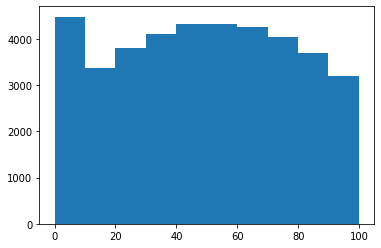

In [30]:
plt.hist(data['revol_util'].apply(lambda x: float(str(x).strip("%"))))
plt.show()

We see there is a RuntimeWarning which is thrown because we have NaN values in the data. This can be ignored for the analysis. 

The values in this column are almost normally distributed except for the ones near 0. This column could be left as is.

#### Column "tax_liens"

This column has a very small part of data as NaN values. Let us analyse the data in this column.

In [31]:
data["tax_liens"].value_counts(dropna=False)

0.0    39678
NaN       39
Name: tax_liens, dtype: int64

The data in this column are all 0's and a few NaNs. There is almost no variation in the data and this cannot provide any reasonable insights for our analysis.

Eliminating this column.

In [32]:
data.drop("tax_liens", axis=1, inplace=True)

#### Column "title"

This column has a very small part of data as NaN values. Let us analyse the data in this column.

In [33]:
data['title'].value_counts()

Debt Consolidation                       2184
Debt Consolidation Loan                  1729
Personal Loan                             659
Consolidation                             517
debt consolidation                        505
                                         ... 
Frank's loan                                1
Purchasing Two Used Cars                    1
Debt Consolidation + Funeral Expenses       1
Refinancing personal line of credit         1
Good income & credit                        1
Name: title, Length: 19615, dtype: int64

In [34]:
print("Number of unique values:", len(data['title'].unique()))

Number of unique values: 19616


This column has the title of the loan and is not categorized with unique values for the most part. The number of uniques values are so huge that the data would not help us gain much insight.

Leaving this data as is.

#### Column "last_credit_pull_d"

This column has a very small part of data as NaN values. Let us analyse the data in this column.

In [35]:
data['last_credit_pull_d']

0        May-16
1        Sep-13
2        May-16
3        Apr-16
4        May-16
          ...  
39712    Jun-10
39713    Jul-10
39714    Jun-07
39715    Jun-07
39716    Jun-10
Name: last_credit_pull_d, Length: 39717, dtype: object

The column shows the most recent month that the lender pulled the credit for the loan. This could be useful for our data analysis. Leaving this as is.

Now that we have analysed all the columns with NaN values. Next, we will cleanup data in each of the columns

______________________________

## Data quality analysis

After removal of unnecessary columns, we will now further look into the remaining data to see if there are any data quality issues.

In [36]:
print("Shape of data:", data.shape)

Shape of data: (39717, 50)


In [37]:
data.describe()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,open_acc,pub_rec,revol_bal,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,policy_code,acc_now_delinq,delinq_amnt,pub_rec_bankruptcies
count,3.971700e+04,3.971700e+04,39717.000000,39717.000000,39717.000000,39717.000000,3.971700e+04,39717.000000,39717.000000,39717.000000,14035.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.0,39717.0,39717.0,39020.000000
mean,6.831319e+05,8.504636e+05,11219.443815,10947.713196,10397.448868,324.561922,6.896893e+04,13.315130,0.146512,0.869200,35.900962,9.294408,0.055065,13382.528086,22.088828,51.227887,50.989768,12153.596544,11567.149118,9793.348813,2263.663172,1.363015,95.221624,12.406112,2678.826162,1.0,0.0,0.0,0.043260
std,2.106941e+05,2.656783e+05,7456.670694,7187.238670,7128.450439,208.874874,6.379377e+04,6.678594,0.491812,1.070219,22.020060,4.400282,0.237200,15885.016641,11.401709,375.172839,373.824457,9042.040766,8942.672613,7065.522127,2608.111964,7.289979,688.744771,148.671593,4447.136012,0.0,0.0,0.0,0.204324
min,5.473400e+04,7.069900e+04,500.000000,500.000000,0.000000,15.690000,4.000000e+03,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.0,0.0,0.000000
25%,5.162210e+05,6.667800e+05,5500.000000,5400.000000,5000.000000,167.020000,4.040400e+04,8.170000,0.000000,0.000000,18.000000,6.000000,0.000000,3703.000000,13.000000,0.000000,0.000000,5576.930000,5112.310000,4600.000000,662.180000,0.000000,0.000000,0.000000,218.680000,1.0,0.0,0.0,0.000000
50%,6.656650e+05,8.508120e+05,10000.000000,9600.000000,8975.000000,280.220000,5.900000e+04,13.400000,0.000000,1.000000,34.000000,9.000000,0.000000,8850.000000,20.000000,0.000000,0.000000,9899.640319,9287.150000,8000.000000,1348.910000,0.000000,0.000000,0.000000,546.140000,1.0,0.0,0.0,0.000000
75%,8.377550e+05,1.047339e+06,15000.000000,15000.000000,14400.000000,430.780000,8.230000e+04,18.600000,0.000000,1.000000,52.000000,12.000000,0.000000,17058.000000,29.000000,0.000000,0.000000,16534.433040,15798.810000,13653.260000,2833.400000,0.000000,0.000000,0.000000,3293.160000,1.0,0.0,0.0,0.000000
max,1.077501e+06,1.314167e+06,35000.000000,35000.000000,35000.000000,1305.190000,6.000000e+06,29.990000,11.000000,8.000000,120.000000,44.000000,4.000000,149588.000000,90.000000,6311.470000,6307.370000,58563.679930,58563.680000,35000.020000,23563.680000,180.200000,29623.350000,7002.190000,36115.200000,1.0,0.0,0.0,2.000000


Upon further investigation, it could be found that there are columns with constant values. These columns do not contribute any useful information and can be removed.

In [38]:
data.drop(data.columns[data.nunique() == 1], axis=1, inplace=True)

In [39]:
print("Shape of data:", data.shape)

Shape of data: (39717, 44)


Also, the columns, 'id', 'member_id' and 'url' are completely unique values. 'url' will not be relevant for the analysis. These can be removed for the data analysis.

In [40]:
data.drop(['id', 'member_id', 'url'], axis=1, inplace=True)

In [41]:
data.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,pub_rec_bankruptcies
0,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,credit_card,Computer,860xx,AZ,27.65,0,Jan-85,1,NaN,3,0,13648,83.70%,9,0.00,0.00,5863.155187,5833.84,5000.00,863.16,0.00,0.00,0.00,Jan-15,171.62,May-16,0.0
1,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,car,bike,309xx,GA,1.00,0,Apr-99,5,NaN,3,0,1687,9.40%,4,0.00,0.00,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,Sep-13,0.0
2,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,small_business,real estate business,606xx,IL,8.72,0,Nov-01,2,NaN,2,0,2956,98.50%,10,0.00,0.00,3005.666844,3005.67,2400.00,605.67,0.00,0.00,0.00,Jun-14,649.91,May-16,0.0
3,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,other,personel,917xx,CA,20.00,0,Feb-96,1,35.0,10,0,5598,21%,37,0.00,0.00,12231.890000,12231.89,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,Apr-16,0.0
4,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,1 year,RENT,80000.0,Source Verified,Dec-11,Current,other,Personal,972xx,OR,17.94,0,Jan-96,0,38.0,15,0,27783,53.90%,38,524.06,524.06,3513.330000,3513.33,2475.94,1037.39,0.00,0.00,0.00,May-16,67.79,May-16,0.0


In [42]:
data['purpose'].unique()

array(['credit_card', 'car', 'small_business', 'other', 'wedding',
       'debt_consolidation', 'home_improvement', 'major_purchase',
       'medical', 'moving', 'vacation', 'house', 'renewable_energy',
       'educational'], dtype=object)

In [43]:
data['title'].unique()

array(['Computer', 'bike', 'real estate business', ...,
       'Retiring credit card debt', 'MBA Loan Consolidation', 'JAL Loan'],
      dtype=object)

When looking into the columns 'purpose' and 'title', it can be observed that 'purpose' column has standardized categories and makes the 'title' column redundant. Thus, removing the 'title' column.

In [44]:
data.drop('title', axis=1, inplace=True)

Now, let us look into each of the remaining columns

In [45]:
data.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,pub_rec_bankruptcies
0,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,credit_card,860xx,AZ,27.65,0,Jan-85,1,NaN,3,0,13648,83.70%,9,0.00,0.00,5863.155187,5833.84,5000.00,863.16,0.00,0.00,0.00,Jan-15,171.62,May-16,0.0
1,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,car,309xx,GA,1.00,0,Apr-99,5,NaN,3,0,1687,9.40%,4,0.00,0.00,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,Sep-13,0.0
2,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,small_business,606xx,IL,8.72,0,Nov-01,2,NaN,2,0,2956,98.50%,10,0.00,0.00,3005.666844,3005.67,2400.00,605.67,0.00,0.00,0.00,Jun-14,649.91,May-16,0.0
3,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,other,917xx,CA,20.00,0,Feb-96,1,35.0,10,0,5598,21%,37,0.00,0.00,12231.890000,12231.89,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,Apr-16,0.0
4,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,1 year,RENT,80000.0,Source Verified,Dec-11,Current,other,972xx,OR,17.94,0,Jan-96,0,38.0,15,0,27783,53.90%,38,524.06,524.06,3513.330000,3513.33,2475.94,1037.39,0.00,0.00,0.00,May-16,67.79,May-16,0.0


##### Analysing the 'loan_status' column

In [46]:
data['loan_status'].value_counts()

Fully Paid     32950
Charged Off     5627
Current         1140
Name: loan_status, dtype: int64

'loan_status' column has the above listed three categories. Out of these, we will not be able to gain any meaningful insights for our business objective with the "Current" category.

The entries with the "Current" category can be removed.

In [47]:
data = data[data['loan_status'] != 'Current']

###### Analysing the datatypes in columns

In [48]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38577 entries, 0 to 39716
Data columns (total 40 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   loan_amnt                38577 non-null  int64  
 1   funded_amnt              38577 non-null  int64  
 2   funded_amnt_inv          38577 non-null  float64
 3   term                     38577 non-null  object 
 4   int_rate                 38577 non-null  object 
 5   installment              38577 non-null  float64
 6   grade                    38577 non-null  object 
 7   sub_grade                38577 non-null  object 
 8   emp_length               37544 non-null  object 
 9   home_ownership           38577 non-null  object 
 10  annual_inc               38577 non-null  float64
 11  verification_status      38577 non-null  object 
 12  issue_d                  38577 non-null  object 
 13  loan_status              38577 non-null  object 
 14  purpose               

It could be seen that 'int_rate' and 'revol_util' which are continous variables are defined as object datatype. Converting these columns to float values

In [49]:
data.loc[:, 'int_rate'] = data['int_rate'].apply(lambda x: float(x.strip('%')))
data.loc[:, 'revol_util'] = data['revol_util'].str.strip('%').apply(lambda x: float(x))

The 'issue_d' shows the month in which the loan was funded. This can be converted to two different __derived__ columns namely 'issue_month' and 'issue_year'. This might help us in getting some insights in our analysis.

In [50]:
data['issue_month'] = pd.to_datetime(data['issue_d'],format='%b-%y', errors='coerce').dt.month
data['issue_year'] = pd.to_datetime(data['issue_d'],format='%b-%y', errors='coerce').dt.year

Now the 'issue_d' column is redundant. Hence dropping the column.

In [51]:
data.drop('issue_d', axis=1, inplace=True)

Now, let's see if the newly added columns look as expected.

In [52]:
data.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,loan_status,purpose,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,pub_rec_bankruptcies,issue_month,issue_year
0,5000,5000,4975.0,36 months,10.65,162.87,B,B2,10+ years,RENT,24000.0,Verified,Fully Paid,credit_card,860xx,AZ,27.65,0,Jan-85,1,NaN,3,0,13648,83.7,9,0.0,0.0,5863.155187,5833.84,5000.00,863.16,0.00,0.00,0.00,Jan-15,171.62,May-16,0.0,12,2011
1,2500,2500,2500.0,60 months,15.27,59.83,C,C4,< 1 year,RENT,30000.0,Source Verified,Charged Off,car,309xx,GA,1.00,0,Apr-99,5,NaN,3,0,1687,9.4,4,0.0,0.0,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,Sep-13,0.0,12,2011
2,2400,2400,2400.0,36 months,15.96,84.33,C,C5,10+ years,RENT,12252.0,Not Verified,Fully Paid,small_business,606xx,IL,8.72,0,Nov-01,2,NaN,2,0,2956,98.5,10,0.0,0.0,3005.666844,3005.67,2400.00,605.67,0.00,0.00,0.00,Jun-14,649.91,May-16,0.0,12,2011
3,10000,10000,10000.0,36 months,13.49,339.31,C,C1,10+ years,RENT,49200.0,Source Verified,Fully Paid,other,917xx,CA,20.00,0,Feb-96,1,35.0,10,0,5598,21.0,37,0.0,0.0,12231.890000,12231.89,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,Apr-16,0.0,12,2011
5,5000,5000,5000.0,36 months,7.90,156.46,A,A4,3 years,RENT,36000.0,Source Verified,Fully Paid,wedding,852xx,AZ,11.20,0,Nov-04,3,NaN,9,0,7963,28.3,12,0.0,0.0,5632.210000,5632.21,5000.00,632.21,0.00,0.00,0.00,Jan-15,161.03,Jan-16,0.0,12,2011


Resetting the index

In [53]:
data = data.reset_index(drop=True)

In [54]:
print("Shape of data:", data.shape)

Shape of data: (38577, 41)


We have 38577 entries of loan data with 41 different variables.

______________________________

## Data analysis

Let us see the number of borrowers who have fully paid and who have defaulted.

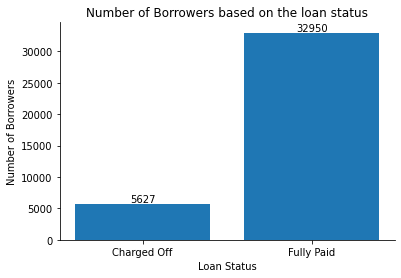

In [55]:
labels, counts = np.unique(data['loan_status'], return_counts=True) #getting the labels and counts of each category
fig, ax = plt.subplots()

bar = plt.bar(labels, counts, align='center')
ax.bar_label(bar)
plt.xlabel('Loan Status')
plt.ylabel('Number of Borrowers')
plt.title('Number of Borrowers based on the loan status')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.show()

It can be seen that a good amount of borrowers have fully paid back the loan. The ratio of loan defaulters are comparatively lower.

Now, let us look at the distribution of loan amount funded by the lender.

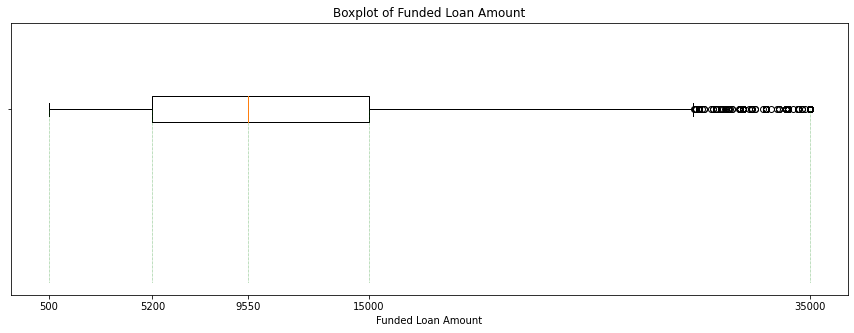

In [56]:
quantiles = np.quantile(data['funded_amnt'], np.array([0.00, 0.25, 0.50, 0.75, 1.00])) # finding the quartile limits

fig, ax = plt.subplots(figsize=(15,5))

plt.boxplot(data['funded_amnt'], vert=False)
ax.vlines(quantiles, [0] * quantiles.size, [1] * quantiles.size, color='g', ls=':', lw= 0.5)
plt.xlabel('Funded Loan Amount')
plt.yticks([1], [''])
ax.set_xticks(quantiles)
plt.title('Boxplot of Funded Loan Amount')

plt.show()

It can be observed that the minimum amount of loan funded is \\$500 and the maximum amount is \\$35000. However it can also be observed that around 50% of the loan funded is between \\$5200 and \\$15000. The median amount of loan funded is \\$9550.

We could see some of the funded loan amount are outliers. We will leave the outliers as is for the time being and handle when necessary.

### Univariate Analysis

Let us look at the impact of loan status based on the purpose of loan taken. The count for each category of "purpose" is normalized to have a better insight.

A type-driven metric is derived from the 'purpose' column and the values are normalized to make the data look more meaningful.

In [57]:
#function for adding text with percentage over the bars
def display_percentage(plot):
    for p in plot.ax.patches:
        txt = str(p.get_height().round(2)) + '%'
        txt_x = p.get_x() 
        txt_y = p.get_height()
        catplt.ax.text(txt_x,txt_y,txt)

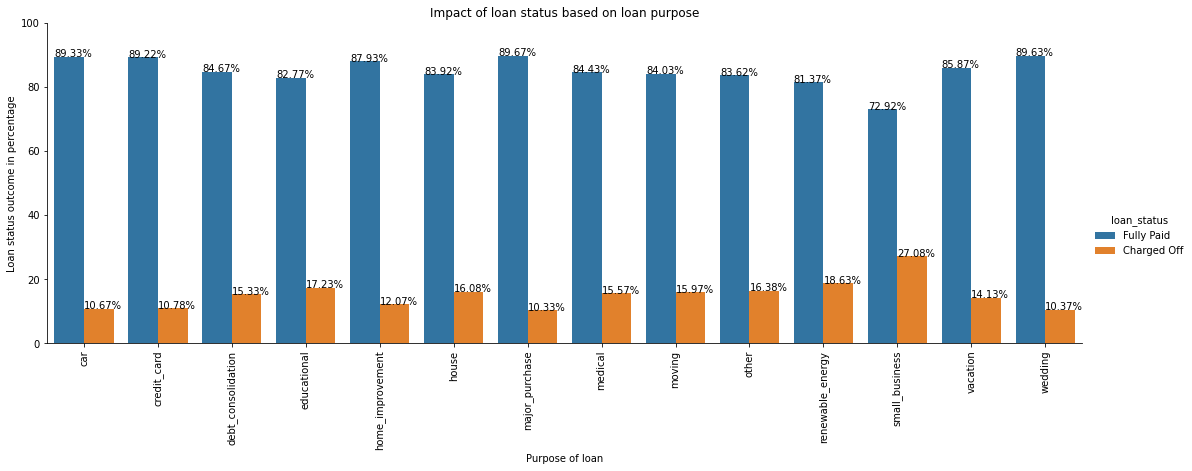

In [58]:
status_vs_purpose = data.groupby('purpose')['loan_status'].value_counts(normalize=True).mul(100)
status_vs_purpose = status_vs_purpose.rename('ratio').reset_index()

catplt = sns.catplot(data=status_vs_purpose, x='purpose', y='ratio', hue='loan_status', kind='bar', height=5, aspect=3)
catplt.ax.set_ylim(0,100)

display_percentage(catplt)

plt.xticks(rotation = 90)
plt.title('Impact of loan status based on loan purpose')
plt.xlabel('Purpose of loan')
plt.ylabel('Loan status outcome in percentage')
plt.show()

From the above plot, it can be noticed that loans provided for the purpose of "Small business" has the highest loan default percentage when compared to the other categories. Also, categories such as car, credit card, major purchase and wedding have the least loan default percentage.

LendingClub should do more scrutiny of the borrower when the purpose of loan is "Small business".

Now, let us look into the outcome of loan status with respect to the number of credit inquiries made on the borrower in the last 6 months.

A type-driven metric is derived from the 'inq_last_6mths' column and the values are normalized to make the data look more meaningful.

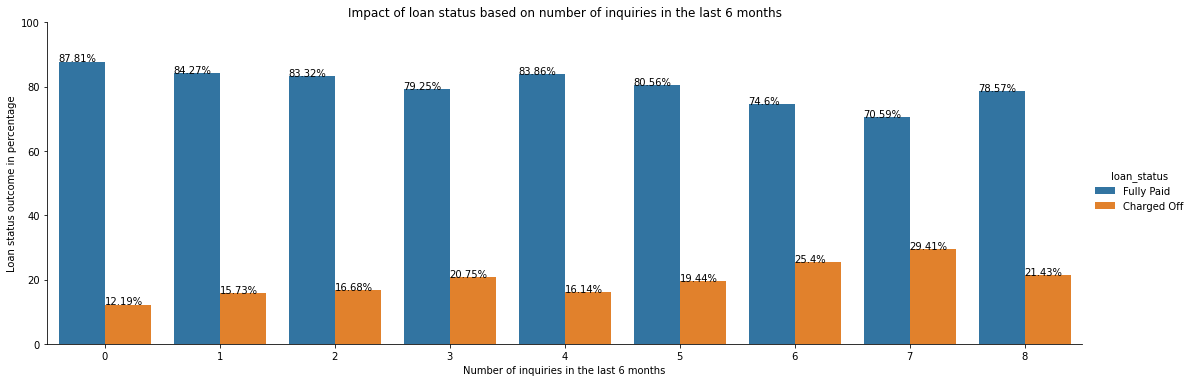

In [59]:
status_vs_inquiries = data.groupby('inq_last_6mths')['loan_status'].value_counts(normalize=True).mul(100)
status_vs_inquiries = status_vs_inquiries.rename('ratio').reset_index()

catplt = sns.catplot(data=status_vs_inquiries, x='inq_last_6mths', y='ratio', hue='loan_status', kind='bar', height=5, aspect=3)
catplt.ax.set_ylim(0,100)

display_percentage(catplt)

plt.title('Impact of loan status based on number of inquiries in the last 6 months')
plt.xlabel('Number of inquiries in the last 6 months')
plt.ylabel('Loan status outcome in percentage')
plt.show()

From the above plot, it could be inferred that borrowers with zero credit inquiries in the last 6 months are less likely to default. For higher number of inquiries, the defaulting on loan is always higher.

Now, let us look at the influence of loan grade on the loan status outcome.

A type-driven metric is derived from the 'loan_status' column and the values are normalized to make the data look more meaningful.

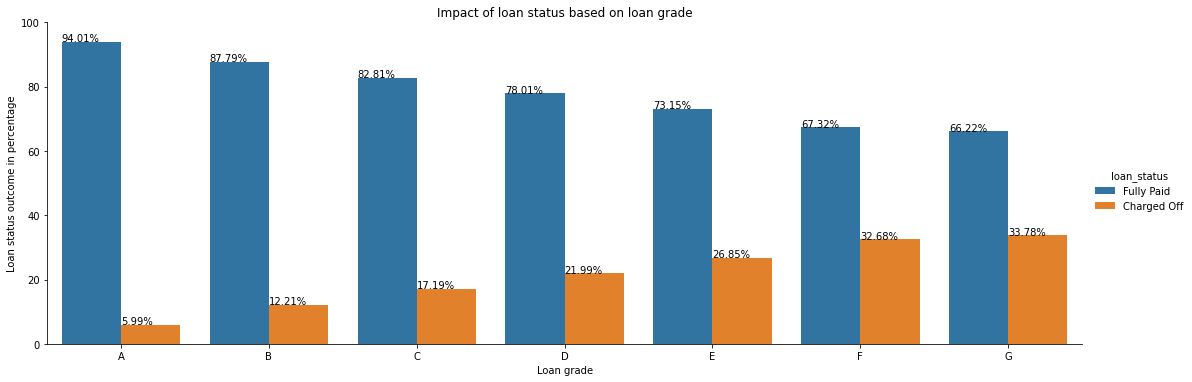

In [60]:
status_vs_grade = data.groupby('grade')['loan_status'].value_counts(normalize=True).mul(100)
status_vs_grade = status_vs_grade.rename('ratio').reset_index()

catplt = sns.catplot(data=status_vs_grade, x='grade', y='ratio', hue='loan_status', kind='bar', height=5, aspect=3)
catplt.ax.set_ylim(0,100)

display_percentage(catplt)

plt.title('Impact of loan status based on loan grade')
plt.xlabel('Loan grade')
plt.ylabel('Loan status outcome in percentage')
plt.show()

From the above plot, it could be observed that chances of loan defaults increase as the loan grade goes from A to G. Loan grade of A usually have low default chances and grade of G has the highest default probability.

Now, let us see the effect of "Available Revolving credit available to the borrower" and the chances of loan default

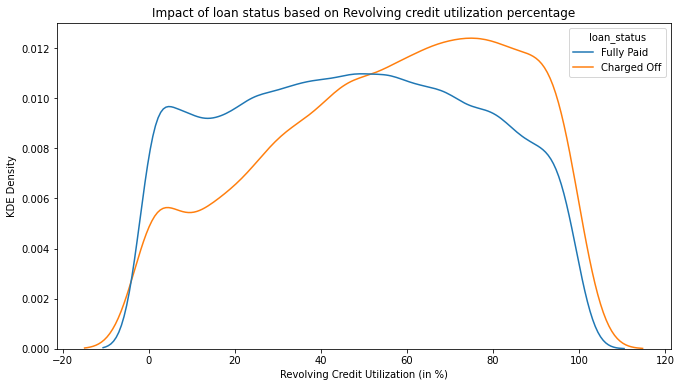

In [61]:
plt.figure(figsize=(11,6))
sns.kdeplot(data=data, x='revol_util', hue='loan_status',common_norm=False)
plt.title('Impact of loan status based on Revolving credit utilization percentage')
plt.xlabel('Revolving Credit Utilization (in %)')
plt.ylabel('KDE Density')
plt.show()

From the above plot, it can be seen that people who usually have a higher revolving credit utilization percentage of above 40% tend to default on the loan more when compared to the people who have lesser revolving credit utilization. 

Next, let us see the effect of interest rate of the loan on the final outcome of the loan status

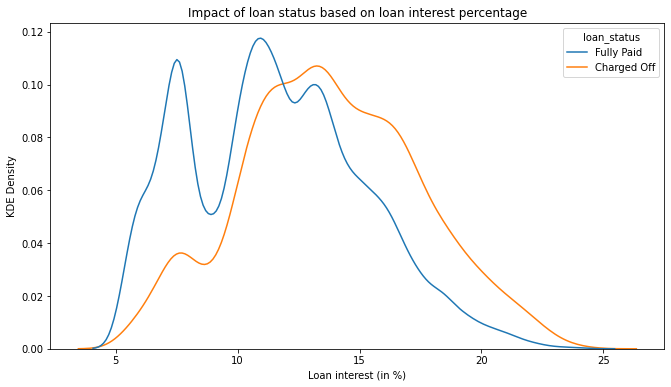

In [62]:
plt.figure(figsize=(11,6))
sns.kdeplot(data=data, x='int_rate', hue='loan_status',common_norm=False)

plt.title('Impact of loan status based on loan interest percentage')
plt.xlabel('Loan interest (in %)')
plt.ylabel('KDE Density')
plt.show()

From the above plot, it can be observed that the "Charged off" loans usually had a higher interest rate when compared to the "Fully paid" loans. The compounding effect of high interest could have made the borrowers not pay the full amount back to LendingClub.

LendingClub could consider lowering the loan interest rates to make it easier for the borrowers to repay the money promptly.

### Bivariate Analysis

In this section, we will make use of two different variables at a time to gain insights from the data.

First, let us look into the data again.

In [63]:
data.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,loan_status,purpose,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,pub_rec_bankruptcies,issue_month,issue_year
0,5000,5000,4975.0,36 months,10.65,162.87,B,B2,10+ years,RENT,24000.0,Verified,Fully Paid,credit_card,860xx,AZ,27.65,0,Jan-85,1,NaN,3,0,13648,83.7,9,0.0,0.0,5863.155187,5833.84,5000.00,863.16,0.00,0.00,0.00,Jan-15,171.62,May-16,0.0,12,2011
1,2500,2500,2500.0,60 months,15.27,59.83,C,C4,< 1 year,RENT,30000.0,Source Verified,Charged Off,car,309xx,GA,1.00,0,Apr-99,5,NaN,3,0,1687,9.4,4,0.0,0.0,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,Sep-13,0.0,12,2011
2,2400,2400,2400.0,36 months,15.96,84.33,C,C5,10+ years,RENT,12252.0,Not Verified,Fully Paid,small_business,606xx,IL,8.72,0,Nov-01,2,NaN,2,0,2956,98.5,10,0.0,0.0,3005.666844,3005.67,2400.00,605.67,0.00,0.00,0.00,Jun-14,649.91,May-16,0.0,12,2011
3,10000,10000,10000.0,36 months,13.49,339.31,C,C1,10+ years,RENT,49200.0,Source Verified,Fully Paid,other,917xx,CA,20.00,0,Feb-96,1,35.0,10,0,5598,21.0,37,0.0,0.0,12231.890000,12231.89,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,Apr-16,0.0,12,2011
4,5000,5000,5000.0,36 months,7.90,156.46,A,A4,3 years,RENT,36000.0,Source Verified,Fully Paid,wedding,852xx,AZ,11.20,0,Nov-04,3,NaN,9,0,7963,28.3,12,0.0,0.0,5632.210000,5632.21,5000.00,632.21,0.00,0.00,0.00,Jan-15,161.03,Jan-16,0.0,12,2011


Let us find the relationship between the "funded loan amount" and the "annual income" reported by the borrower

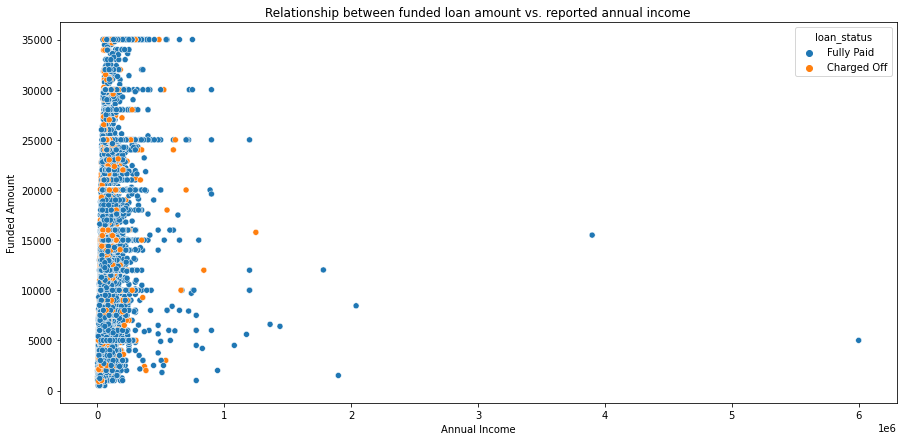

In [64]:
plt.figure(figsize=(15,7))
sns.scatterplot(data=data, y='funded_amnt', x='annual_inc', hue="loan_status")
plt.title("Relationship between funded loan amount vs. reported annual income")
plt.xlabel('Annual Income')
plt.ylabel('Funded Amount')
plt.show()


We could see the outliers in the annual income data make it harder to visualize the data clearly. Let us now remove the outliers in the income range data and plot the same graph again.

__Removing outliers__ with z-score above 3 for the annual income data

In [65]:
data_annual_inc = data[(np.abs(stats.zscore(data['annual_inc'])) < 3)]

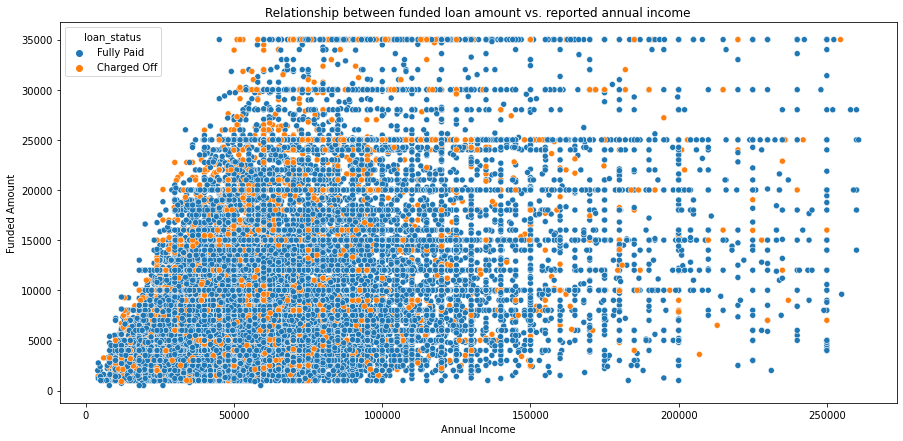

In [66]:
plt.figure(figsize=(15,7))
sns.scatterplot(data=data_annual_inc, y='funded_amnt', x='annual_inc', hue="loan_status")
plt.title("Relationship between funded loan amount vs. reported annual income")
plt.xlabel('Annual Income')
plt.ylabel('Funded Amount')
plt.show()

In the left side of the plot, we could see a slope indicating a small positive correlation between the annual income and the funded loan amount. However, this plot does not provide any insight when it comes to the loan status as the data is spread out almost evenly.

Let us look at the same data in a different angle. Create a __derived__ column which has the ratio between the funded loan amount and the annual income.

In [67]:
data['funded_vs_income'] = (data['loan_amnt'] / data['annual_inc']) * 100

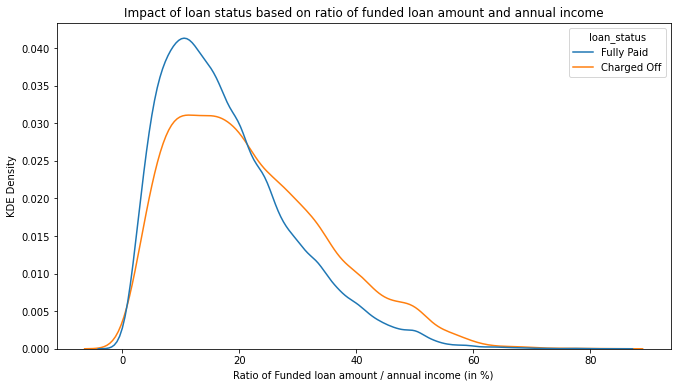

In [68]:
plt.figure(figsize=(11,6))
sns.kdeplot(data=data, x='funded_vs_income', hue='loan_status',common_norm=False)

plt.title('Impact of loan status based on ratio of funded loan amount and annual income')
plt.xlabel('Ratio of Funded loan amount / annual income (in %)')
plt.ylabel('KDE Density')
plt.show()

From the above plot, we can clearly see that once the ratio of funded loan amount and annual income crosses 20%, the chances of loan getting defaulted becomes higher.

Now, let us check the relationship between the revolving credit utilization and the purpose of the loan taken with respect to loan status.

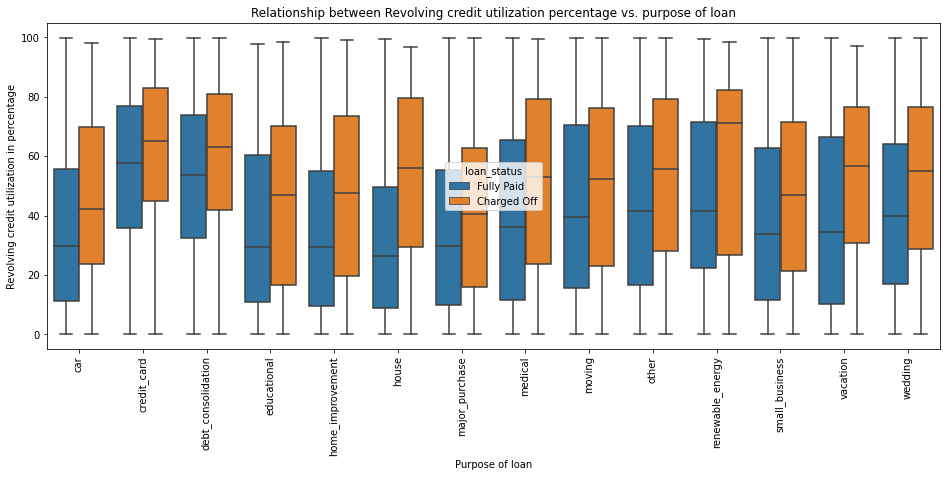

In [69]:
plt.figure(figsize=(16,6))
sns.boxplot(data=data, x='purpose', y='revol_util', hue='loan_status', order=sorted(data['purpose'].unique()))
plt.xticks(rotation = 90)
plt.title('Relationship between Revolving credit utilization percentage vs. purpose of loan')
plt.xlabel('Purpose of loan')
plt.ylabel('Revolving credit utilization in percentage')
plt.show()

It can be seen from the above figure that the revolving credit utilization percentage is always higher for the people who default on the loan. There is a stark difference that can be seen in the "house" category where the majority of the people who had a higher revolving credit utilization percentage had defaulted on the loan.

Next, let us check the impact of revolving credit utilization percentage and the grade assigned for the loan.

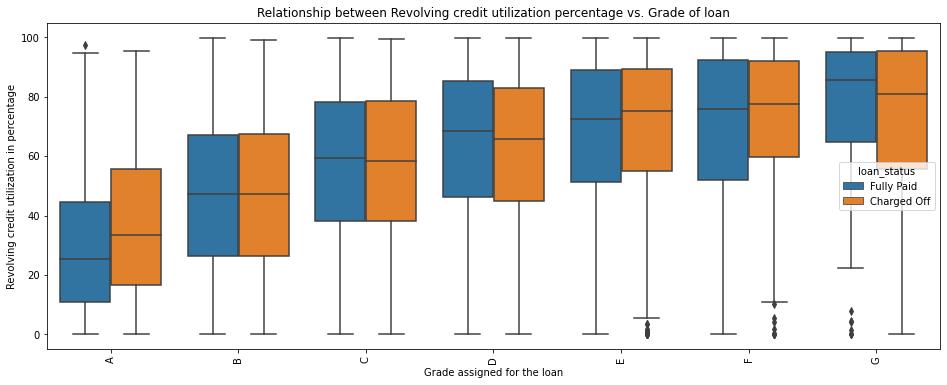

In [70]:
plt.figure(figsize=(16,6))
sns.boxplot(data=data, x='grade', y='revol_util', hue='loan_status', order=sorted(data['grade'].unique()))
plt.xticks(rotation = 90)
plt.title('Relationship between Revolving credit utilization percentage vs. Grade of loan')
plt.xlabel('Grade assigned for the loan')
plt.ylabel('Revolving credit utilization in percentage')
plt.show()

Though the distribution between "fully paid" and "charged off" are more or less similar for most grades, we could get a valuable insight from Grade A. We could observe that borrowers with the credit utilization percentage on the higher side tend to default on the loan even though the loan grade is A.

_______________

# Inference

From the data analysis on the Lending Club's loan data, we could figure out some of the driving factors that affect whether the loan will be fully repaid or defaulted. These factors include:

- Purpose of the loan taken
- Loan interest percentage
- Revolving credit utilization percentage 
- Number of inquiries made in the last 6 months
- Grade of the loan

The lender should be wary of these facts and should disburse loans to avoid credit loss. For high default risk cases, the lender could ask the borrower to pledge collaterals. This could in turn help avoid financial loss for the lending company.